<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Timeseries Modeling

_Adapted for DSI-EAST-1 by Justin Pounders (ATL)_

---

### Learning Objectives
- Make timeseries "stationary" and test for stationarity
- Build and test ARMA models

## Goals of *Times Series Analysis*

Like "usual" statistical analysis

- *Inference*: underlying mechanisms represented by observations
- *Forecasting*: prediction of the future


---

## Time Series: Stationarity

> Many models we will explore will assume stationarity.

*Stationarity* is the assumption that the **time series** has constant mean and variance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pyflux as pf

sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Make some fake data

n_points = 201
t = np.linspace(0, 100, n_points)

r = (t/50)**2
s = np.sin(t*2*np.pi/10)
e = np.random.normal(scale=0.25, size=n_points)
y = r + s + e

d0 = datetime.now()
dt1 = timedelta(1)
t = [d0+dt1*i for i in t]
df = pd.DataFrame(y, index=t, columns=['signal'])
df.head()

,signal
2017-12-12 01:46:49.370902,0.142563
2017-12-12 13:46:49.370902,-0.110159
2017-12-13 01:46:49.370902,0.642075
2017-12-13 13:46:49.370902,0.725802
2017-12-14 01:46:49.370902,0.886027


In [3]:
dt1

datetime.timedelta(1)

Text(0.5,0,'Time')

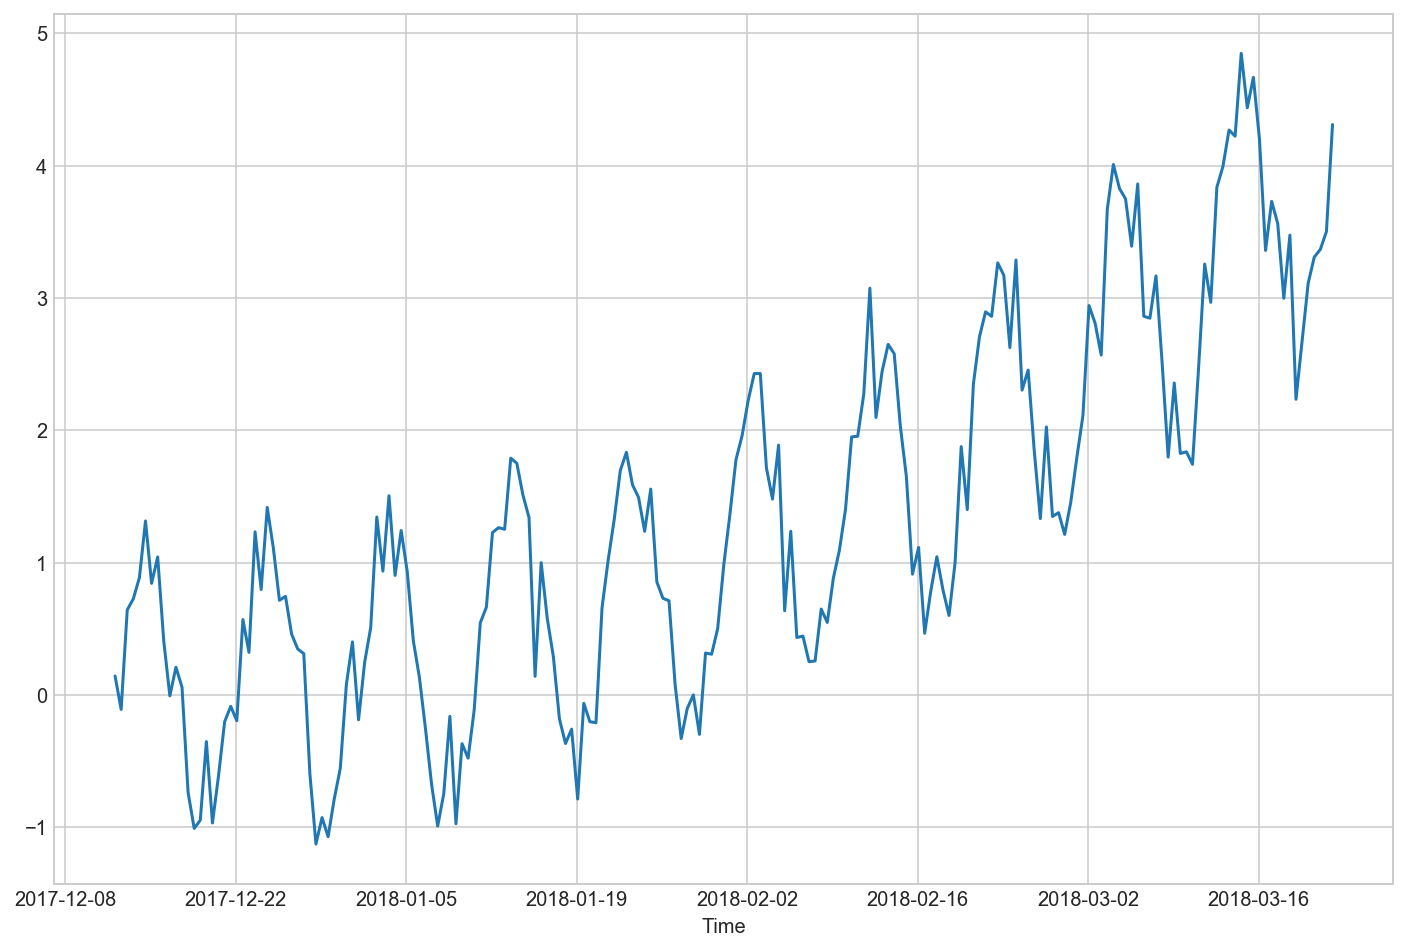

In [4]:
plt.figure(figsize=(12,8))
plt.plot(t, y)
plt.xlabel('Time')

(C1) **Is the above *stationary***?


**Questions:** 
- *What is the long-term behavior of my series?*
- *How does my time series fluctuate?*


--- 

## Time Series Decomposition

$$ Y_t = T_t + S_t + C_t + \varepsilon_t$$

- $Y_t = $ observed value at time $t$
- $T_t = $ trend component, *long-run behavior*
- $S_t = $ seasonality component, *periodic fluctuations*
- $C_t = $ cyclical component, *non-periodic fluctuations*
- $\varepsilon_t = $ noise component, *we would like this to be stationary*

> Decomposition above is additive; can also be multiplicative.


There are several algorithms for performing this decomposition

- Classical decomp., [https://www.otexts.org/fpp/6/3](https://www.otexts.org/fpp/6/3)
- X-12-ARIMA, [https://www.otexts.org/fpp/6/4](https://www.otexts.org/fpp/6/4)
- STL, [https://www.otexts.org/fpp/6/5](https://www.otexts.org/fpp/6/5)

See also `seasonal_decompose` in `statsmodel.tsa.seasonal`.  

> Nice tutorial here: [http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/](http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

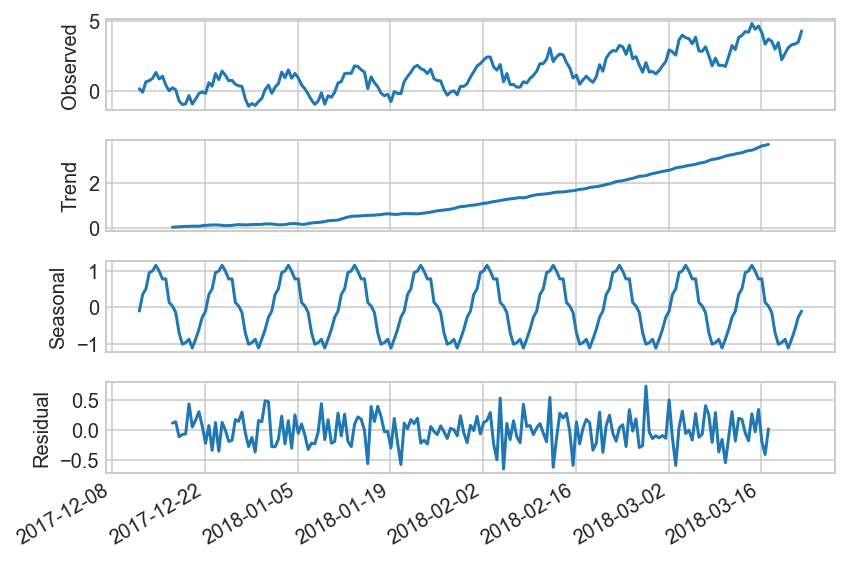

In [6]:
result = seasonal_decompose(df, freq=20)
result.plot();

---

## Autocorrelation

- In *non-time-series* analyses we often **must** assume observations $Y_i$ are **independent**
- In *time-series* analysis we often **must** assume observations are **dependent**

*Autocorrelation* allows us to check for this type of *sequential dependence*?

---

The *correlation* between time series is

$$ Corr(Y_t, Z_t) = \frac{Cov(Y_t,Z_t)}{\sqrt{Var(Y_t)Var(Z_t)}} $$


The *autocorrelation of a series* is the correlation between a time series and a **lagged version** of itself.

$$ Corr(Y_t, Y_{t+k}) = \frac{Cov(Y_t,Y_{t+k})}{\sqrt{Var(Y_t)Var(Y_{t+k})}} $$

---

### Let's do this with `statsmodels`

In [7]:
df.head()

,signal
2017-12-12 01:46:49.370902,0.142563
2017-12-12 13:46:49.370902,-0.110159
2017-12-13 01:46:49.370902,0.642075
2017-12-13 13:46:49.370902,0.725802
2017-12-14 01:46:49.370902,0.886027


[ 1.          0.92679891  0.88076786  0.81460781  0.72770836  0.64134674
  0.55189411  0.48331374  0.41366012  0.3618859   0.34483041  0.35008856
  0.37618251  0.41803341  0.46934088  0.53560041  0.59260838  0.64602761
  0.69086096  0.70636644  0.70302466  0.68241195  0.63153309  0.57064259
  0.501279    0.42357545  0.34874455  0.27454885  0.21795042  0.18216572
  0.15483489  0.15389703  0.18959956  0.22053305  0.26685149  0.31622551
  0.37479177  0.41858424  0.44105151  0.47174879  0.47486618  0.44290338
  0.40611216  0.3522097   0.29453597  0.22143722  0.15049016  0.09341177
  0.03267019  0.00258946 -0.01381312 -0.01326351  0.00735817  0.02700513
  0.07251717  0.11814967  0.16288273  0.20552058  0.23384942  0.2462826
  0.2413544   0.23078541  0.19588918  0.15412959  0.10051059  0.04249276
 -0.01368378 -0.06672949 -0.10480998 -0.13213777 -0.14757521 -0.14885983
 -0.13010037 -0.10077544 -0.07140232 -0.03277421  0.01175222  0.04000477
  0.06176705  0.07489631  0.07361432]


Text(0,0.5,'ACF')

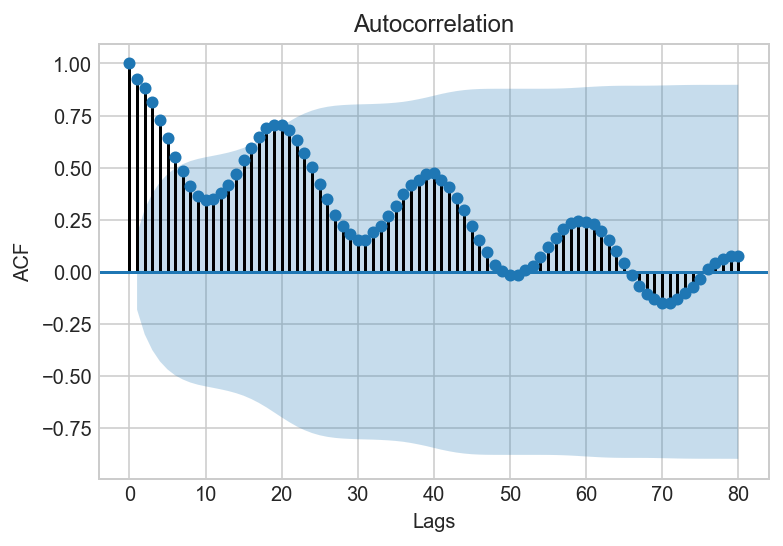

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

print(acf(df.signal, nlags=80))

plot_acf(df.signal, lags=80, alpha=0.01);
plt.xlabel('Lags')
plt.ylabel('ACF')

(C3) **Check:** 

1. What does autocorrelation tell you?
2. Which component of the signal is it likely to reveal?

### *Partial* Autocorrelation

*Partial autocorrelation* (PACF) is similar to autocorrelation (ACF), but instead of just the correlation at increasing lags, it is the correlation at a given lag _controlling for the effect of previous lags._


[ 1.          0.93143291  0.1665188  -0.14593672 -0.25867287 -0.11434855
 -0.04289323  0.16540867  0.04257753  0.06607815  0.24315276  0.2782887
  0.21155818  0.12298916  0.02897677  0.14265124  0.07243781  0.02706483
  0.01375955 -0.12237209 -0.11785691 -0.01455714 -0.16693439 -0.11583337
 -0.01338108 -0.04235228 -0.01223338 -0.0879497  -0.07969024  0.06515896
 -0.06107347 -0.05075295  0.27239699 -0.00537904 -0.02202105 -0.03625868
  0.06707741  0.05023123 -0.11941045  0.06565218  0.14356172 -0.2047846
 -0.09131298 -0.01783705  0.01218186 -0.06045446 -0.10829066 -0.07506289
 -0.05857415  0.11679113  0.01224752]


Text(0,0.5,'PACF')

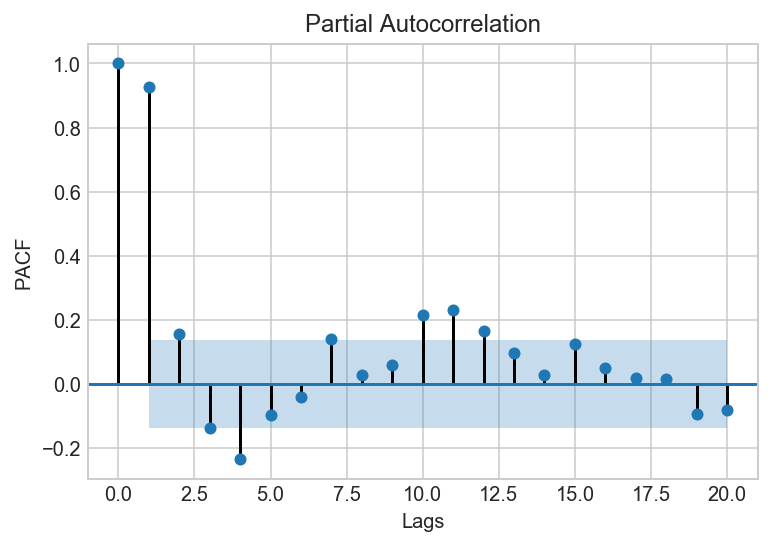

In [9]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

print(pacf(df.signal, nlags=50))

plot_pacf(df.signal, lags=20);
plt.xlabel('Lags')
plt.ylabel('PACF')

### Let's get some real data

In [10]:
data = pd.read_csv('datasets/seasonally-adjusted-quarterly-us.csv')
data.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [11]:
data.columns = ['year_quarter', 'unemployment_rate']
data['unemployment_rate'] = data['unemployment_rate'].map(lambda x: float(str(x).replace('%','')))
data.dropna(inplace=True)
data.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [12]:
data.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [13]:
type(pd.to_datetime(data.year_quarter).dt.to_period('Q')[0])

pandas._libs.period.Period

In [14]:
pd.to_datetime(data.year_quarter).dt.to_period('Q')[1]

Period('1948Q2', 'Q-DEC')

In [15]:
data['date'] = pd.to_datetime(data.year_quarter).dt.to_period('Q')
data.set_index('date', inplace=True)
data.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


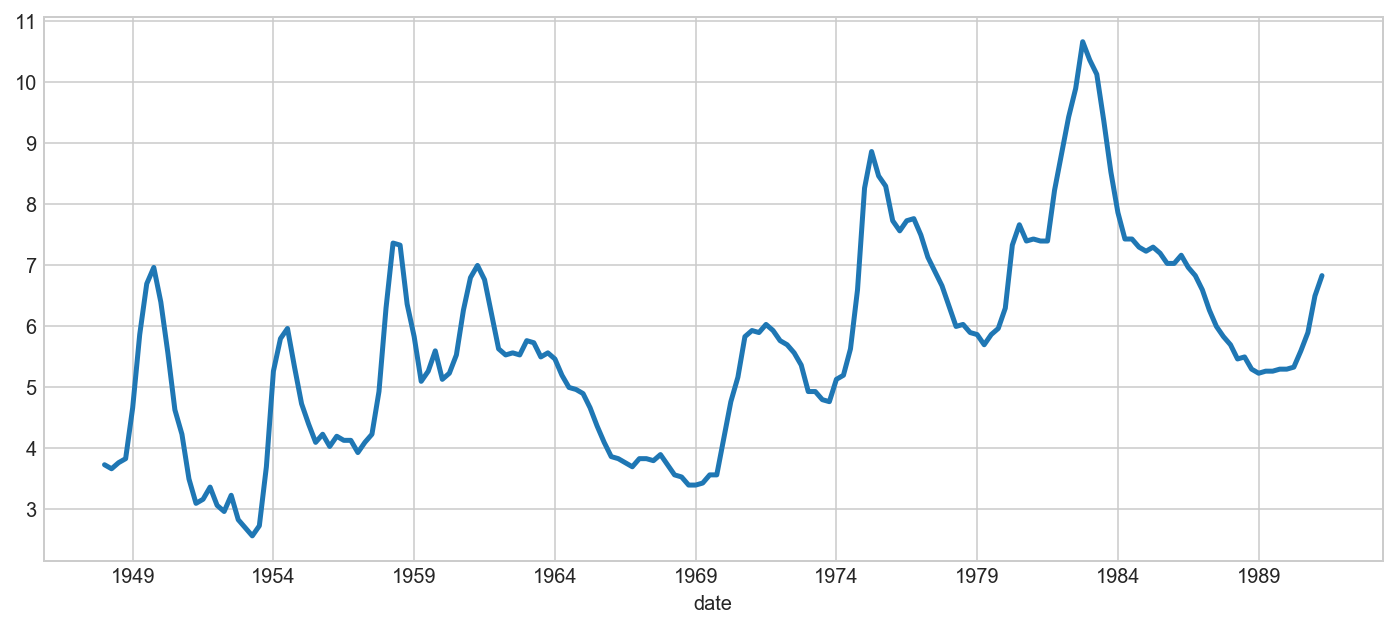

In [16]:
data['unemployment_rate'].plot(lw=2.5, figsize=(12,5))

In [17]:
data.shape

(174, 2)

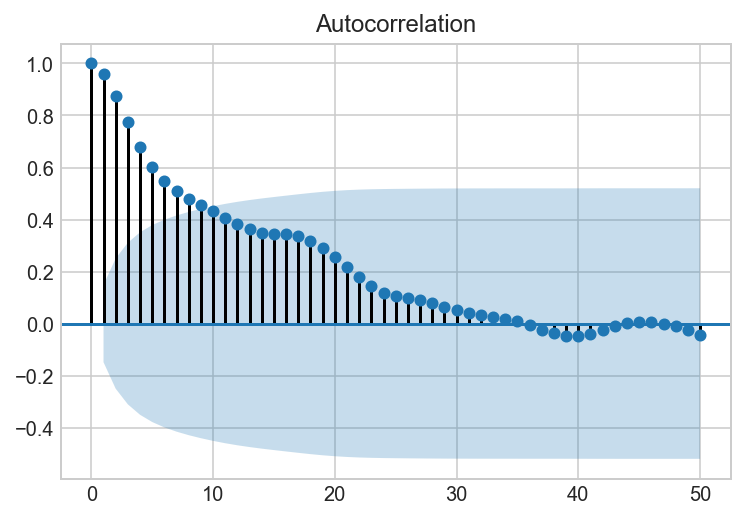

In [18]:
# Plot the ACF of the data for 50 lags
plot_acf(data['unemployment_rate'], lags=50);

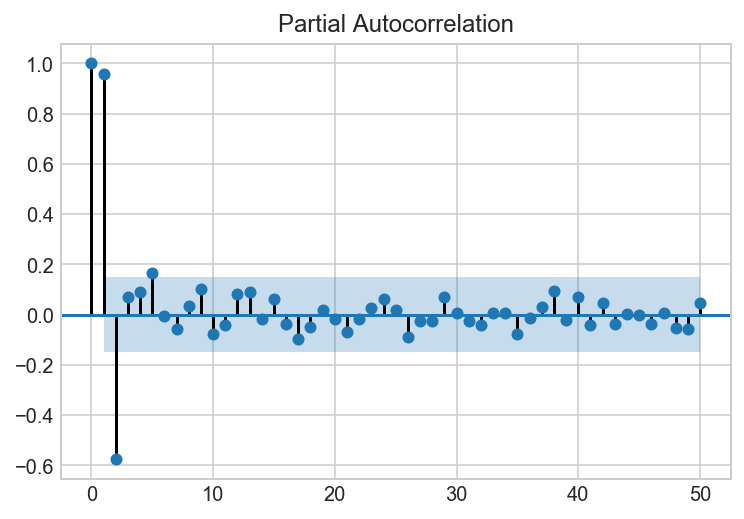

In [19]:
# Plot the PACF of the data for 50 lags
plot_pacf(data.unemployment_rate, lags=50);

## Modeling

Look at our unemployment data:

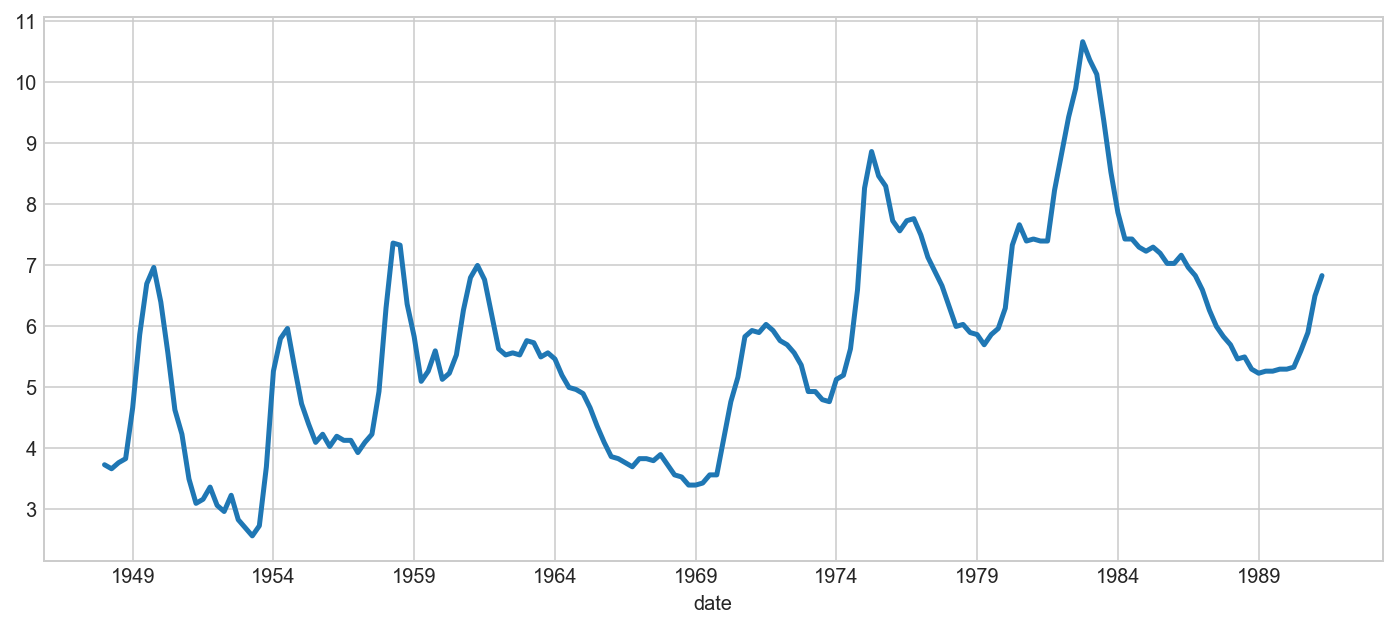

In [20]:
data['unemployment_rate'].plot(lw=2.5, figsize=(12,5))

**Is this data "stationary"?**

Time series modeling typically presumes that we have stationary data.

To stationarize (maybe not a word...) we could possibly take two approaches:

1. Pull the "residual" component from the decomposition and check if it is stationary, or
2. Take a "diff" one or more times.

In [23]:
data_ts.head()

,rate
date,
1948-01-01,3.733
1948-04-01,3.667
1948-07-01,3.767
1948-10-01,3.833
1949-01-01,4.667


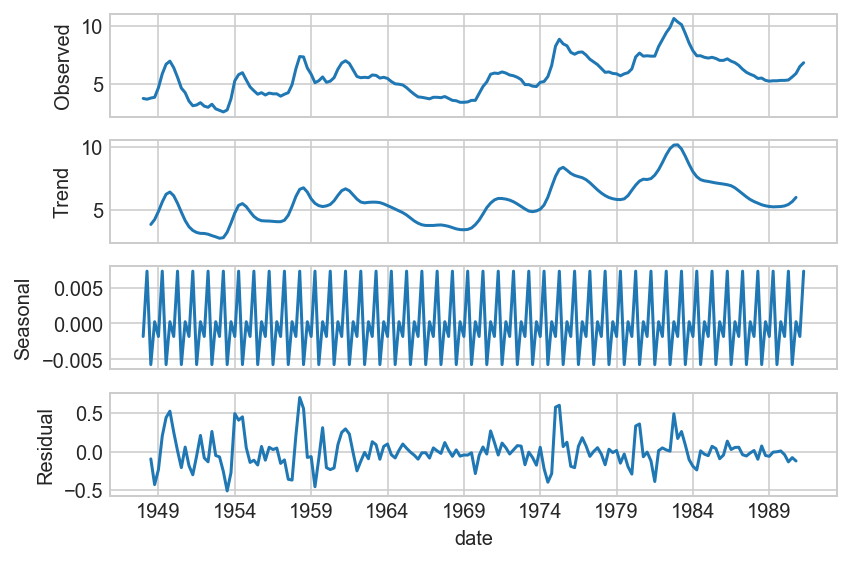

In [22]:
data_ts = pd.DataFrame(data[['unemployment_rate']].values, 
                       columns=['rate'], 
                       index=data.index.to_timestamp())
data_ts.head()
result = seasonal_decompose(data_ts.rate)
result.plot();

## "Differencing" a timeseries and stationarity


If a time series is stationary, the mean, variance, and autocorrelation (covered in the next section) are constant over time. Forcasting methods typically assume that the timeseries you are forcasting on are stationary, or at least approximately stationary.

The most common way to make a timeseries stationary is to perform "differencing". This procedure converts a timeseries into the difference between values:

<a id="-delta-yt--yt---yt--"></a>
### $$ \Delta y_t = y_t - y_{t-1} $$

This removes trends in the timeseries and ensures that the mean across time is zero. In most cases there will only be a need for a single differencing, although sometimes a second difference (or even more) will be taken to remove trends.

**Difference the unemployment rate and plot.**

In [36]:
data['unemp_diff'] = data['unemployment_rate'].diff()
data.head()

,year_quarter,unemployment_rate,unemp_diff
date,,,
1948Q1,1948Q1,3.733,NaN
1948Q2,1948Q2,3.667,-0.066
1948Q3,1948Q3,3.767,0.100
1948Q4,1948Q4,3.833,0.066
1949Q1,1949Q1,4.667,0.834


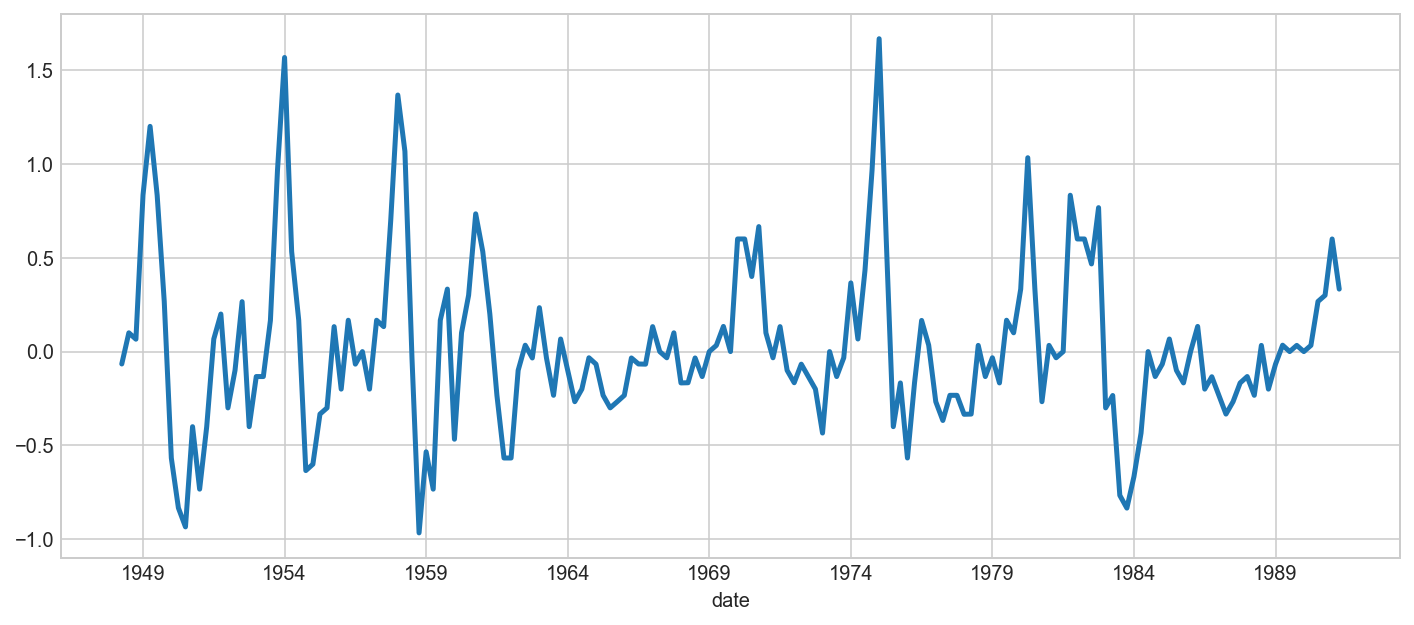

In [37]:
data['unemp_diff'].plot(lw=2.5, figsize=(12,5))

**Plot the ACF and PACF curves of the diff'd series**

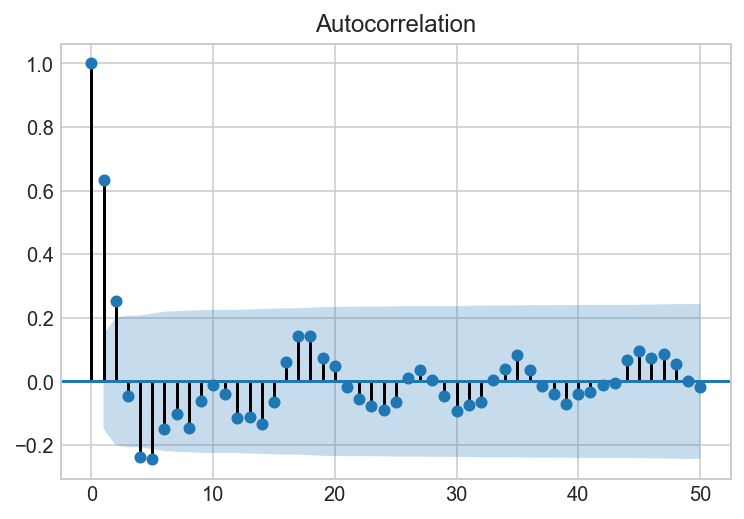

In [38]:
data['unemp_diff'].dropna(inplace=True)
plot_acf(data['unemp_diff'], lags=50);

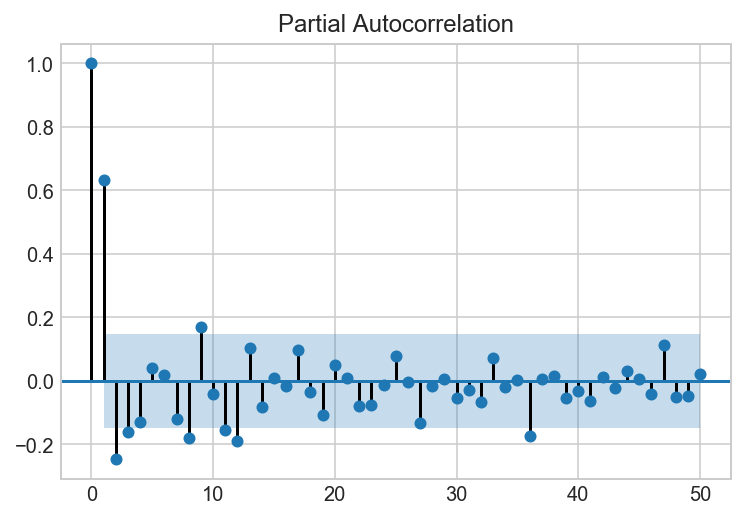

In [39]:
plot_pacf(data['unemp_diff'], lags=50);

In [41]:
undiff = data['unemp_diff']

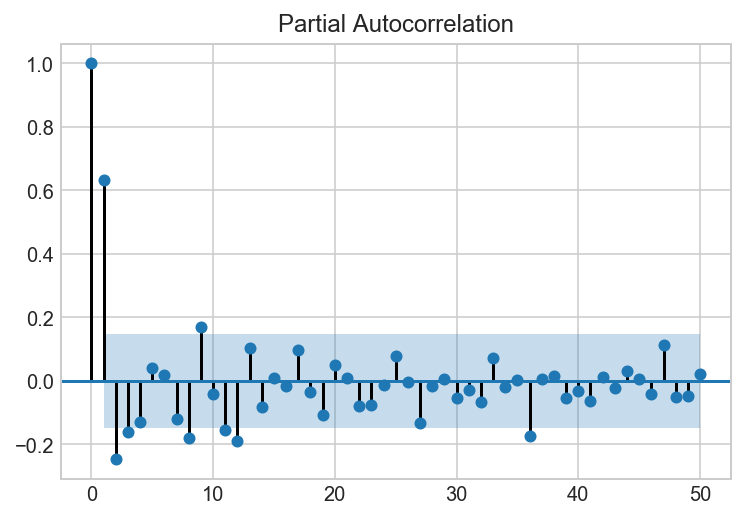

In [42]:
plot_pacf(undiff, lags=50);

(C4) **Check** Why diff?

**Warning!** Don't diff blindly!  Always check to see if you series is really stationary or not.  You may need to diff more than once.

> How do you really know if your timeseries is stationary?  You can formulate stationarity as a hypothesis and then test the hypothesis!  An example of this approach is the [Dickey-Fuller test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
results = adfuller(data['unemp_diff'])
p_value = results[1]
print(p_value)

3.37992811864e-06


In [45]:
results

(-5.4004446187303152,
 3.379928118643472e-06,
 11,
 161,
 {'1%': -3.4716333869322482,
  '10%': -2.5764336472358318,
  '5%': -2.8796651107461972},
 87.182645061172138)

In [46]:
results = adfuller(data['unemployment_rate'].values)
p_value = results[1]
print(p_value)

0.326943599416


## Autoregressive (AR) models

---

Autoregressive (AR) models use data from previous time-points to predict the next time-point. These are essentially regression models where the predictors are previous timepoints of the outcome.

Typically, AR models are denoted `AR(p)`, where _p_ indicates the number of previous time points to incorporate. `AR(1)` is the most common.

In an autoregressive model we learn regression coefficients on the features that are the previous _p_ values.

### $$y_i = \beta_0 + \beta_1  y_{i-1} + \beta_2  y_{i-2}\ +\ ...\ +\ \beta_p  y_{i-p}\ +\ \epsilon \\
y_i =\sum_{j=1}^p \beta_j y_{i-j} + \epsilon$$

We can build autoregressive models using the `ARMA` class from statsmodels. 

> Alternatively, there is a newer python package called pyflux that also looks promising for time series modeling.  We won't cover pyflux in class.

In [47]:
from statsmodels.tsa.arima_model import ARMA

ar1 = ARMA(data['unemp_diff'].values, (1,0)).fit()

In [48]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(1, 0)   Log Likelihood                 -57.550
Method:                       css-mle   S.D. of innovations              0.337
Date:                Tue, 12 Dec 2017   AIC                            121.100
Time:                        01:50:57   BIC                            130.560
Sample:                             0   HQIC                           124.938
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.069      0.293      0.770      -0.115       0.155
ar.L1.y        0.6316      0.058     10.799      0.000       0.517       0.746
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5833           +0.0000j            1.5833            0.0000
-----------------------------------------------------------------------------
"""

**Pro-tip**: AIC in the results above refer to the [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion).  AIC measures the "quality" of your model: lower values of AIC suggest better models!

See also: the #1 answer [here](https://stats.stackexchange.com/questions/187373/interpretation-of-aic-value):

> ... Lower value of AIC suggests "better" model, but it is a relative measure of model fit. It is used for model selection, i.e. it lets you to compare different models estimated on the same dataset.

> Recall G.E.P. Box saying that "all models are wrong, but some are useful", you are not interested in finding model that has a perfect fit to your data because it is impossible and such model in many cases would be a very poor, overfitted one. Instead, you are looking for the best one that you can get, the most useful one. The general idea behind AIC is that model with lower number of parameters is better, what is somehow consistent with Occam's razor argument, that we prefer simple model over a complicated one.

### "In-sample" predictions

In [49]:
# Get predictions from the time series:

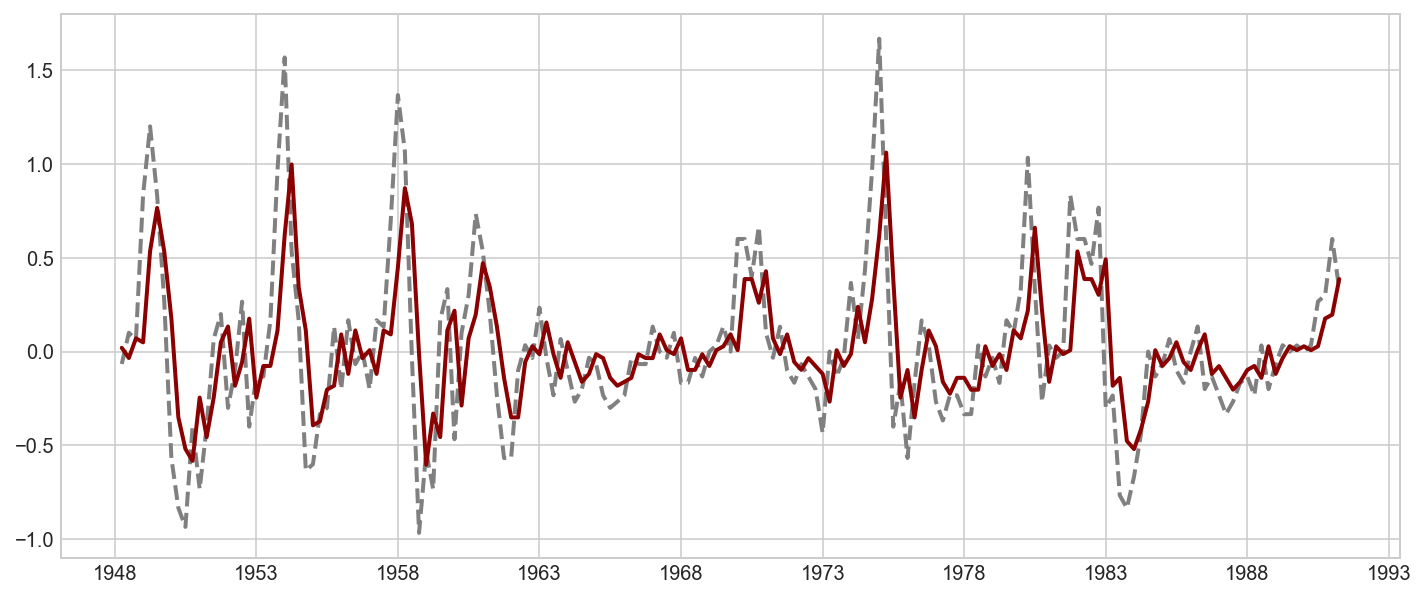

In [50]:
date_ticks = data.index.to_timestamp()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], data['unemp_diff'], 
        lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, 
        lw=2, color='darkred')
plt.show()

You can also "score" the model with the coefficient of determination ($R^2$)

In [51]:
from sklearn.metrics import r2_score

r2_score(data['unemp_diff'], ar1.fittedvalues)

0.40213390114903969

### "Out-of-sample" predictions

*What if we want to predict more than one time step into the future?*

In [52]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample

# get what you need for predicting "steps" steps ahead
params = ar1.params
residuals = ar1.resid
p = ar1.k_ar
q = ar1.k_ma
k_exog = ar1.k_exog
k_trend = ar1.k_trend
steps = 73

oos_predictions = _arma_predict_out_of_sample(params, steps, residuals, 
                                p, q, k_trend, k_exog, 
                                endog=data['unemp_diff'].values, exog=None, start=100)

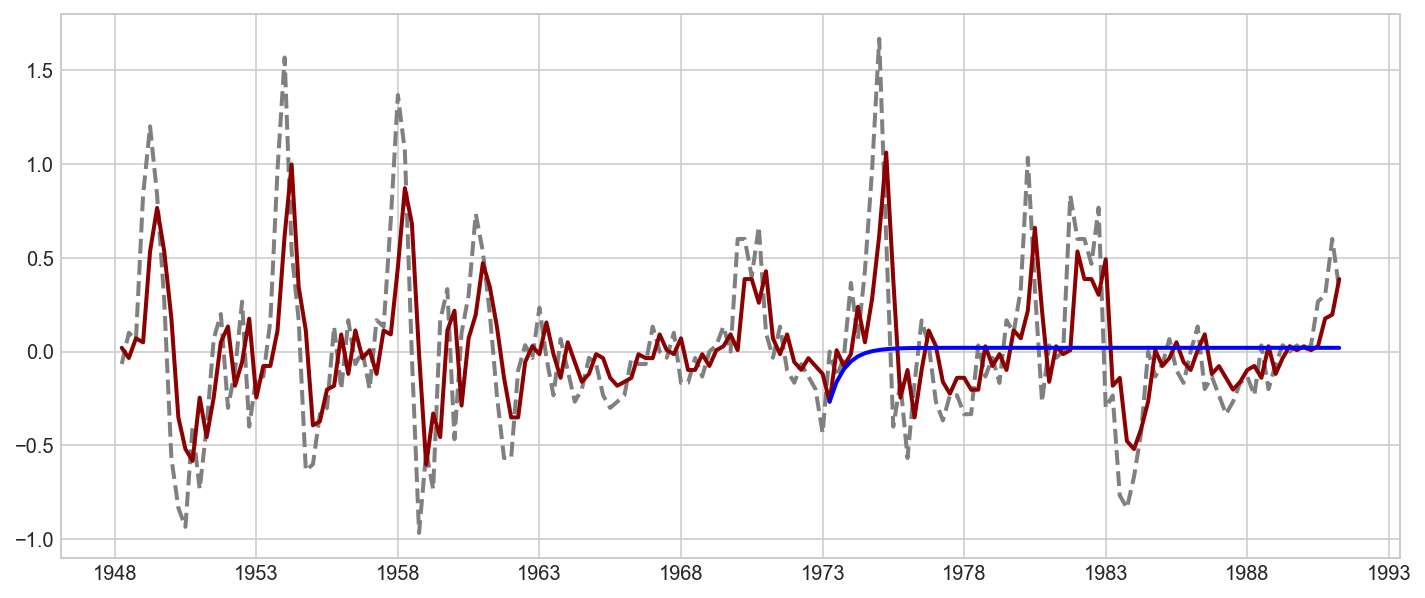

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], data['unemp_diff'], lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, lw=2, color='darkred')
ax.plot(date_ticks[101:], oos_predictions, lw=2, color='blue')
plt.show()

(C5) **Check:** True or False?  Autoregressive (AR) models are just linear regression models where the previous time steps are used to predict the next time step.

## Moving Average (MA) models
---

**Moving average models** take previous _error terms_ as inputs. They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence - like something going out of stock affecting sales or a sudden rise in popularity.

As in autoregressive models, we have an order term, _q_, and we refer to our model as `MA(q)`.  This moving average model is dependent on the last _q_ errors. If we have a time series of sales per week, $y_i$, we can regress each $y_i$ on the last _q_ error terms.

### $$y_t = \epsilon_t + \beta_{1} \epsilon_{t-1} + ... \beta_{n} \epsilon_{t-n} \\
y_t = \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t$$

Sometimes the mean of the timeseries is included in the equation:

### $$ y_t = \mu + \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t $$

Moving average models are not as trivial to fit as autoregressive models because the error terms are unobserved. [There are a variety of different ways you can estimate the parameters, some of which are covered in this paper.](https://www.it.uu.se/research/publications/reports/2006-022/2006-022-nc.pdf)

In the simpler fitting procedures, a model is iteratively fit, errors are computed, then refit, over and over again until the parameters on the errors converge.

MA includes the mean of the time series. The behavior of the model is therefore characterized by random jumps around the mean value.

In an `MA(1)` model, there is one coefficient on the error of our previous prediction impacting our estimate for the next value in the timeseries.


In [84]:
undiff = data['unemp_diff']

In [59]:
ma1 = ARMA(undiff.values, (0,1)).fit()
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(0, 1)   Log Likelihood                 -62.769
Method:                       css-mle   S.D. of innovations              0.347
Date:                Tue, 12 Dec 2017   AIC                            131.538
Time:                        11:20:15   BIC                            140.998
Sample:                             0   HQIC                           135.376
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.042      0.409      0.683      -0.066       0.100
ma.L1.y        0.6068      0.054     11.151      0.000       0.500       0.713
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6480           +0.0000j            1.6480            0.5000
-----------------------------------------------------------------------------
"""

In [60]:
p = 1 # number of terms in AR model
q = 2 # number of terms in MA model
ar1ma1 = ARMA(undiff.values, (1,1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(1, 1)   Log Likelihood                 -53.992
Method:                       css-mle   S.D. of innovations              0.330
Date:                Tue, 12 Dec 2017   AIC                            115.984
Time:                        11:20:16   BIC                            128.598
Sample:                             0   HQIC                           121.101
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.061      0.301      0.763      -0.101       0.138
ar.L1.y        0.4843      0.094      5.166      0.000       0.301       0.668
ma.L1.y        0.2655      0.098      2.701      0.008       0.073       0.458
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0649           +0.0000j            2.0649            0.0000
MA.1           -3.7665           +0.0000j            3.7665            0.5000
-----------------------------------------------------------------------------
"""

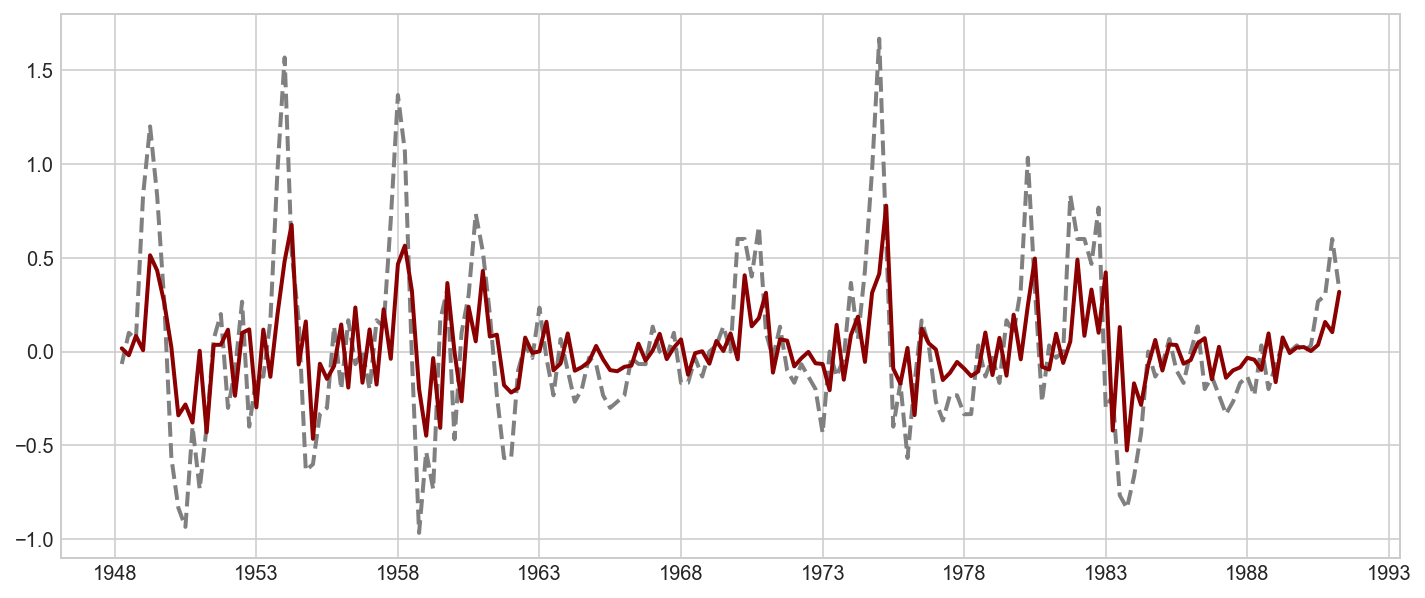

In [61]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], undiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ma1.fittedvalues, lw=2, color='darkred')
plt.show()

In [63]:
r2_score(undiff, ma1.fittedvalues)

0.36445284687838309

## ARMA and ARIMA models
---

**ARMA** models combine the autoregressive models and moving average models. We combine both, parameterizing the behavior of the model with `p` and `q` terms corresponding to the `AR(p)` model and `MA(q)` model.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.

**ARIMA** is just like the `ARMA(p, q)` model, but instead of predicting the value of the series it predicts the _differenced_ series or changes in the series. The order of differencing is set by an _d_ term as in `ARIMA(p, d, q)`, or alternatively you can just fit an `ARMA(p, q)` model on a differenced timeseries.

Recall the pandas `diff` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

### $$y_t - y_{(t-1)} = ARMA(p, q)$$

Timeseries are assumed to be "stationary" when modeling. This handles the stationarity assumption: instead of detrending or differencing manually, the model does this via the differencing term.

In [67]:
arlmal = ARMA(undiff.values, (1,1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                     ARMA(1, 1)   Log Likelihood                 -53.992
Method:                       css-mle   S.D. of innovations              0.330
Date:                Tue, 12 Dec 2017   AIC                            115.984
Time:                        11:21:20   BIC                            128.598
Sample:                             0   HQIC                           121.101
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.061      0.301      0.763      -0.101       0.138
ar.L1.y        0.4843      0.094      5.166      0.000       0.301       0.668
ma.L1.y        0.2655      0.098      2.701      0.008       0.073       0.458
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0649           +0.0000j            2.0649            0.0000
MA.1           -3.7665           +0.0000j            3.7665            0.5000
-----------------------------------------------------------------------------
"""

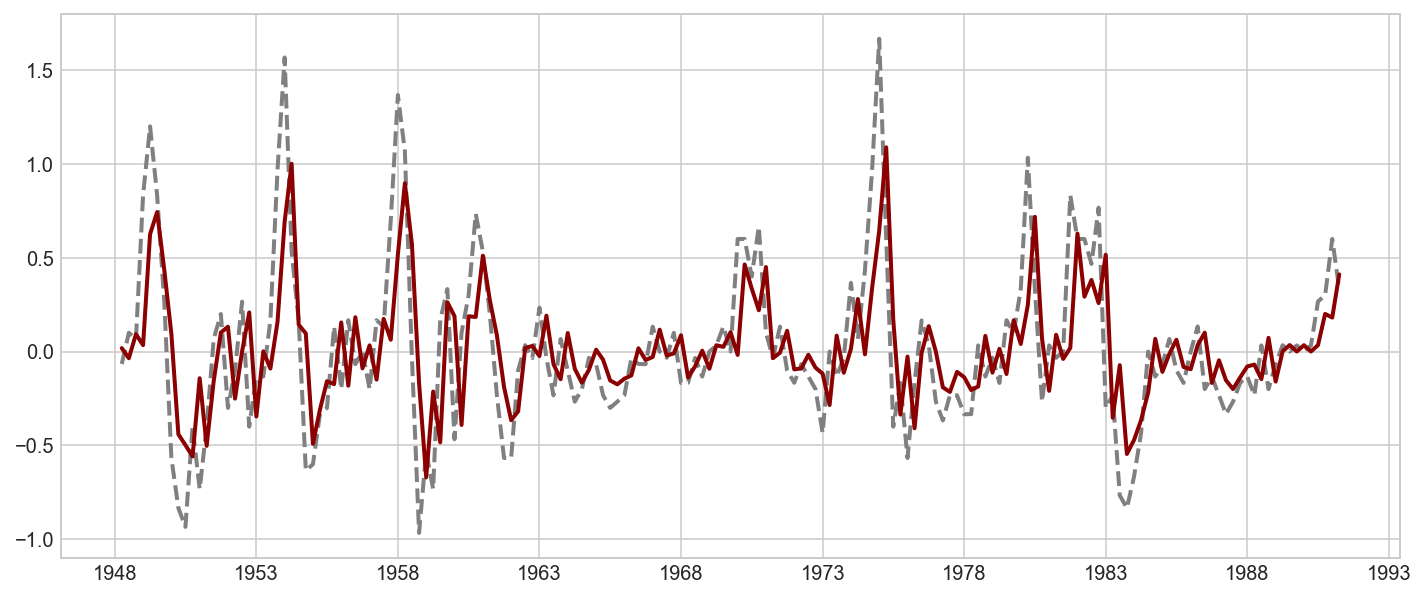

In [66]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], undiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1ma1.fittedvalues, lw=2, color='darkred')
plt.show()

In [68]:
r2_score(undiff, ar1ma1.fittedvalues)

0.4264449957150217

### Reconstructing the "full" prediction

## How to choose the right `p` and `q` parameters.
---

In general it is never a bad idea to choose your parameters based on hold-out testing. That is to say, checking the performance of your model on future timepoints based on different choices of `p` and `q` for an ARIMA model.

However, you can get a sense for what parameters will work best based on the autocorrelation and partial autocorrelation charts.

[This site has a very detailed overview of how to use the acf and pacf to determine your parameters.](https://people.duke.edu/~rnau/411arim3.htm)

In general though, below are some basic guidelines. Remember that these rules apply to the ACF and PACF plots of differenced timeseries rather than the original timeseries (the exception being if your timeseries is stationary and does not require differencing):

1. If the PACF has a sharp cutoff and the lag-1 ACF value is positive then choose an AR(x) term where x is the lag in the PACF after the cutoff.
2. If the ACF has a sharp cutoff and the lag-1 ACF value is negative, choose an MA(x) term where x is the lag in the ACF after the cutoff.
3. If both the ACF and PACF show a gradual decay, and ARMA model is likely appropriate as opposed to the AR or MA alone.

Context 1 above corresponds to timeseries that are "underdifferenced" as indicated by a positive autocorrelation at lat 1. Likewise, context 2 is "overdifferenced" as indicated by the negative autocorrelation.

In general, you should try to choose an AR or MA model alone as opposed to an ARMA model. The AR and MA terms can work against each other in the model and create an overly-complex representation.

## Wrap-up

(C6) Take a couple of minutes in groups of 2-4 and write down the workflow you would use to build a timeseries model.  Write your workflow on a piece of paper, a whiteboard or in Slack.